<a href="https://colab.research.google.com/github/theresaltrinh/project_voting/blob/main/Visuals_Density_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/theresaltrinh/project_voting

Cloning into 'project_voting'...
remote: Enumerating objects: 169, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 169 (delta 53), reused 28 (delta 28), pack-reused 103
Receiving objects: 100% (169/169), 32.25 MiB | 8.57 MiB/s, done.
Resolving deltas: 100% (83/83), done.
Updating files: 100% (53/53), done.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [3]:
df = pd.read_csv('/content/project_voting/cleaned_voting_VA.csv')
df.head()

,Unnamed: 0,year,countyName,countyCode,candidate,party,candidatevotes,totalvotes
0,0,2000,Accomack,51001,Al Gore,Democrat,5092,11925
1,1,2000,Accomack,51001,George W. Bush,Republican,6352,11925
2,2,2000,Accomack,51001,Ralph Nader,Green,220,11925
3,3,2000,Accomack,51001,Other,Other,261,11925
4,4,2000,Albemarle,51003,Al Gore,Democrat,16255,36846


Text(0.5, 1.0, 'Total Votes by Year')

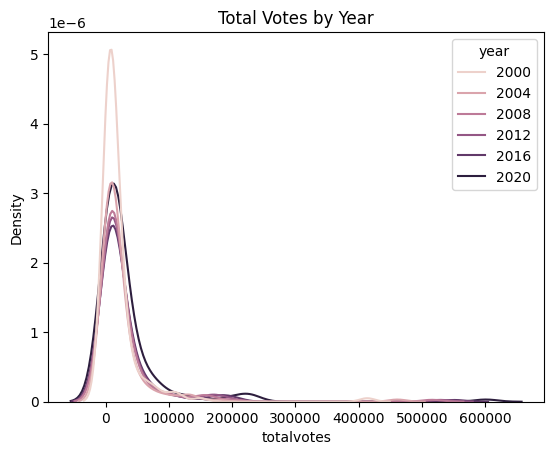

In [4]:
sns.kdeplot(data = df, x = 'totalvotes', hue = 'year')
plt.title('Total Votes by Year')

Text(0.5, 1.0, 'Candidate Votes By Year')

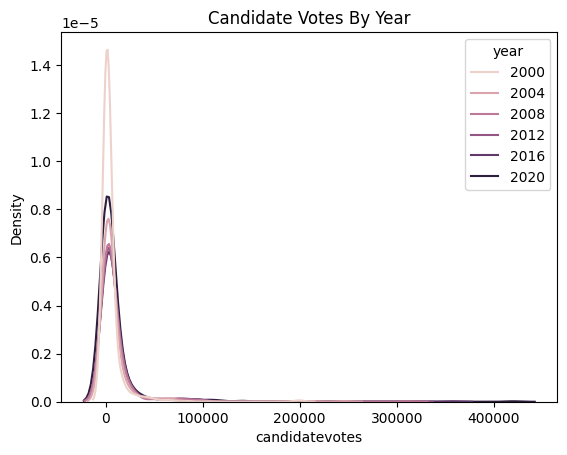

In [5]:
sns.kdeplot(data = df, x = 'candidatevotes', hue = 'year')
plt.title('Candidate Votes By Year')

Text(0.5, 0, 'Votes (Thousands)')

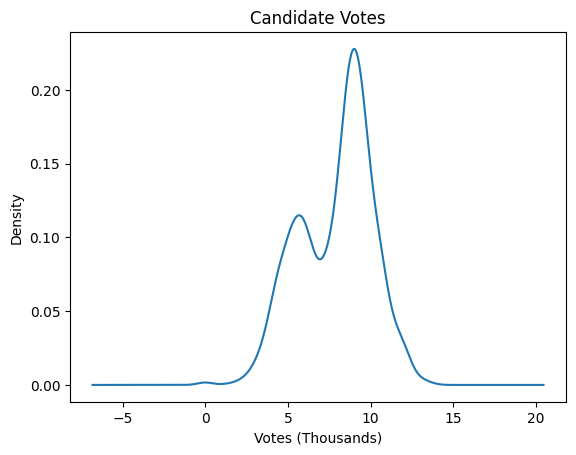

In [30]:
var = 'cvotes_arcsinh'
df[var].plot.density() # That looks pretty bad
plt.title('Candidate Votes')
plt.xlabel('Votes (Thousands)')

Text(0.5, 0, 'Votes (Thousands)')

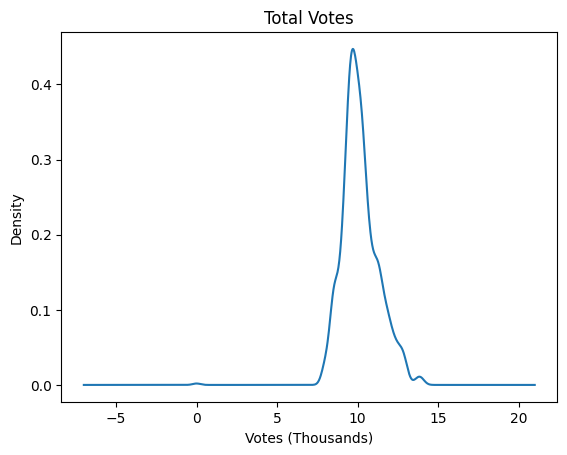

In [31]:
var = 'tvotes_arcsinh'
df[var].plot.density() # That looks pretty bad
plt.title('Total Votes')
plt.xlabel('Votes (Thousands)')

In [7]:
#adjacencies
cdf = pd.read_csv('/content/project_voting/cleaned_county_adjacencies.csv')
cdf.head()
#cdf.describe()

,Unnamed: 0,County,Population,CountyCode,District,Neighborhood1,Neighborhood2,Neighborhood3,Neighborhood4,Neighborhood5,Neighborhood6,Neighborhood7,Neighborhood8,Neighborhood9,Neighborhood10,Neighborhood11,Neighborhood12
0,0,Accomack,33191,51001,2,Northumberland,Lancaster,Middlesex,Mathews,Northampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Albemarle,114534,51003,5,CharlottesvilleCity,Nelson,Augusta,Rockingham,Greene,Orange,Louisa,Fluvanna,Buckingham,Nelson,NaN,NaN
2,2,AlexandriaCity,155525,51510,8,Fairfax,Arlington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Alleghany,14835,51005,6,Craig,Bath,Botetourt,CovingtonCity,Rockbridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Amelia,13455,51007,5,PrinceEdward,Cumberland,Powhatan,Chesterfield,Dinwiddie,Nottoway,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Population', ylabel='Density'>

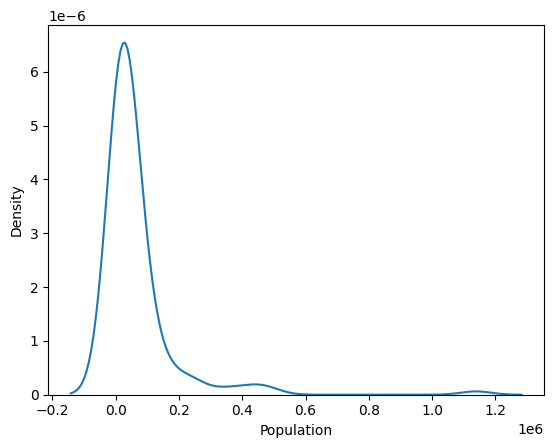

In [9]:
sns.kdeplot(data=cdf, x = 'Population' )

Text(0.5, 1.0, 'County Population')

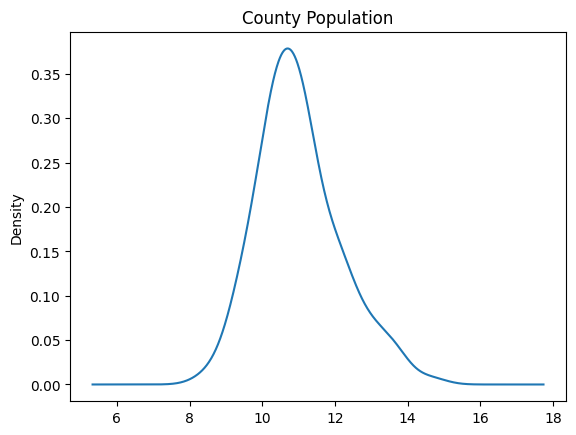

In [26]:
var = 'population_arcsinh'
cdf[var].plot.density()
plt.title('County Population')

Text(0.5, 1.0, 'District')

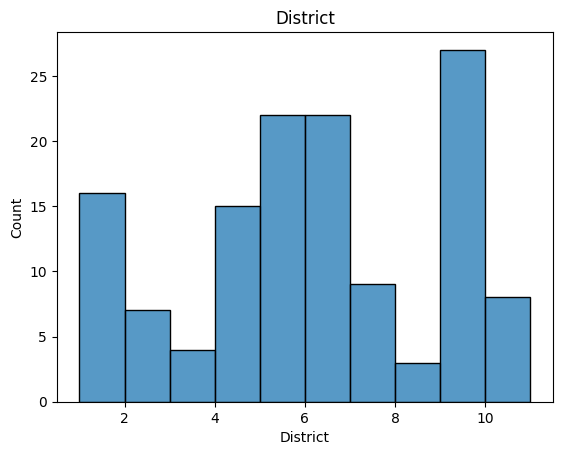

In [11]:

sns.histplot(cdf['District'],bins = 10, edgecolor='black')
plt.title('District')

Text(0.5, 1.0, 'County Populations')

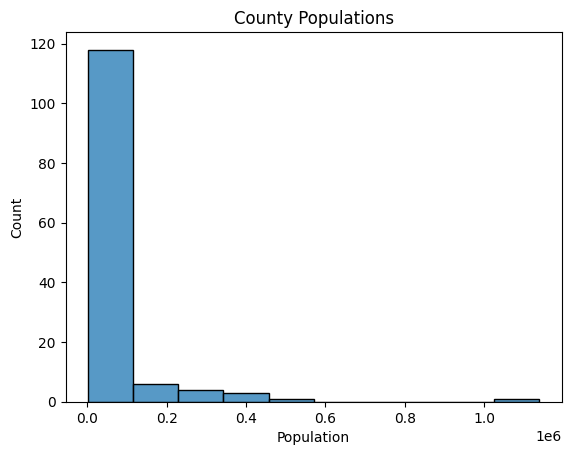

In [12]:
sns.histplot(cdf['Population'],bins = 10, edgecolor='black')
plt.title('County Populations')

Text(0.5, 1.0, 'County Populations')

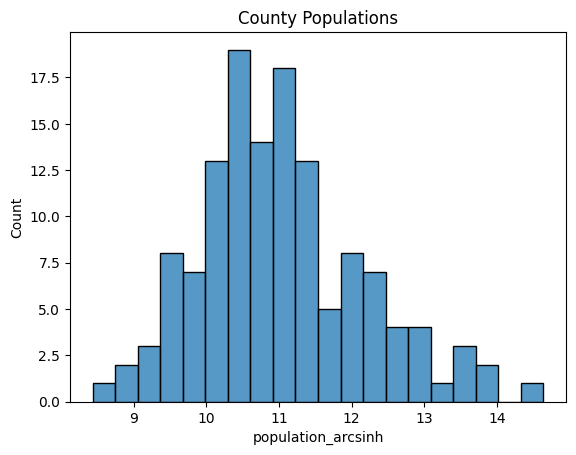

In [13]:
#make population more normally distributed with arcsin
#normalize distribution of candidate votes
cdf['population_arcsinh'] = np.arcsinh(cdf['Population'])
sns.histplot(cdf['population_arcsinh'],bins = 20, edgecolor='black')
plt.title('County Populations')

Text(0.5, 1.0, 'Candidate Votes')

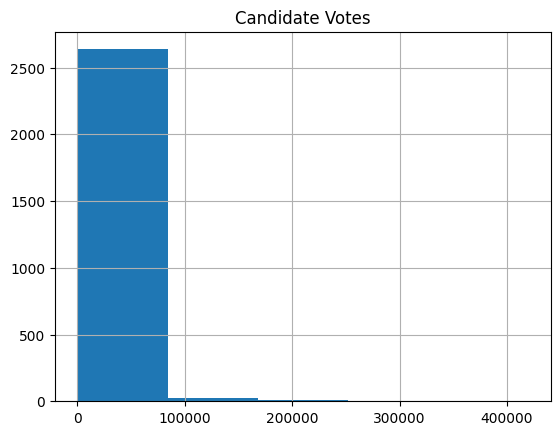

In [14]:
df['candidatevotes'].hist(bins=5)
plt.title('Candidate Votes')

Text(0.5, 1.0, 'Candidate Votes')

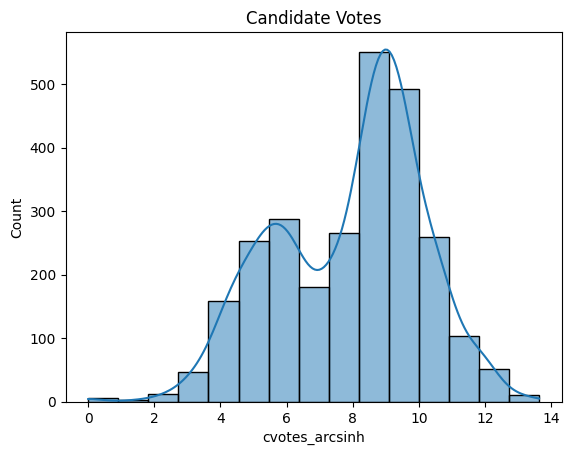

In [15]:
#normalize distribution of candidate votes
df['cvotes_arcsinh'] = np.arcsinh(df['candidatevotes'])
sns.histplot(df['cvotes_arcsinh'],bins = 15, kde=True, edgecolor='black')
plt.title('Candidate Votes')

Text(0.5, 1.0, 'Total Votes')

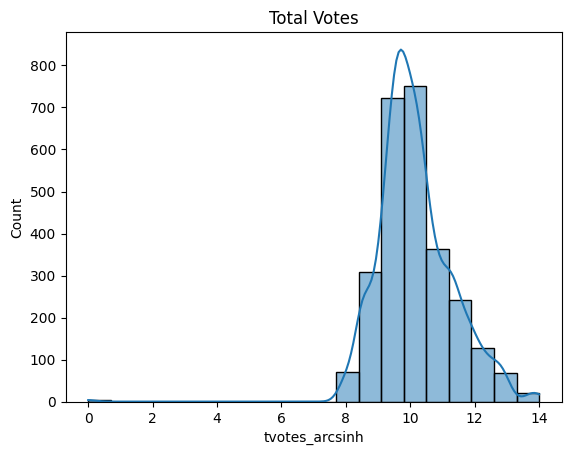

In [16]:
#normalize distribution of candidate votes
df['tvotes_arcsinh'] = np.arcsinh(df['totalvotes'])
sns.histplot(df['tvotes_arcsinh'],bins = 20, kde=True, edgecolor='black')
plt.title('Total Votes')

Text(0.5, 1.0, 'Candidate Votes')

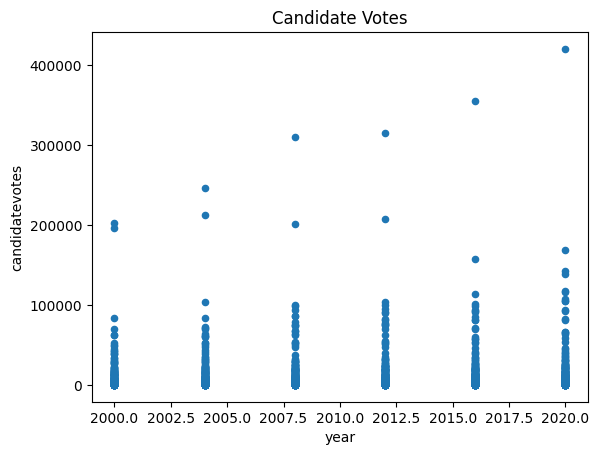

In [18]:
df.plot.scatter(y='candidatevotes',x='year')
plt.title('Candidate Votes')

Text(0.5, 1.0, 'Total Votes')

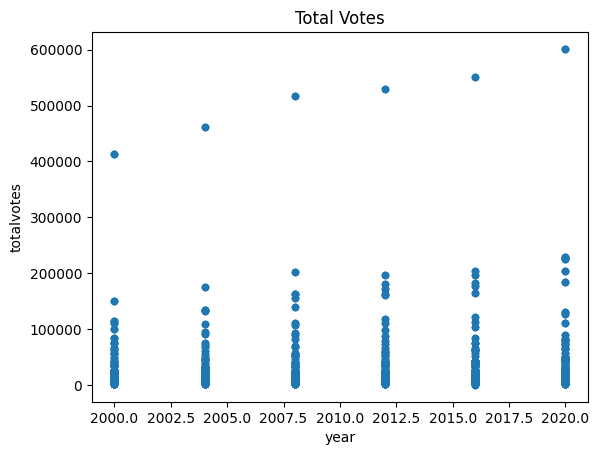

In [19]:
df.plot.scatter(y='totalvotes',x='year')
plt.title('Total Votes')

Text(0.5, 1.0, 'Candidate Votes')

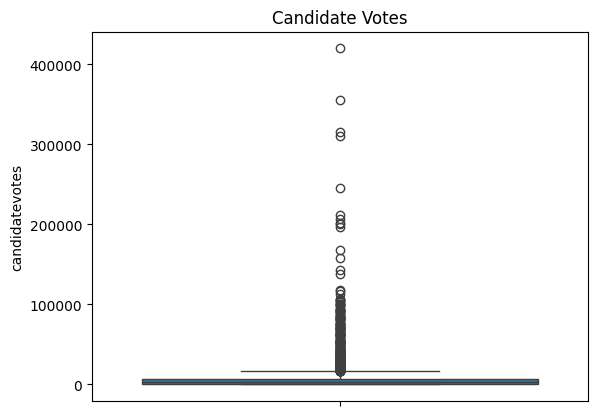

In [20]:
sns.boxplot(df['candidatevotes'])
plt.title('Candidate Votes')

Text(0.5, 1.0, 'Candidate Votes Normalized')

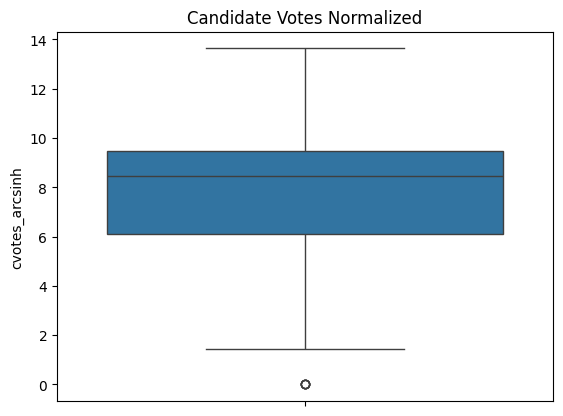

In [21]:
sns.boxplot(df['cvotes_arcsinh'])
plt.title('Candidate Votes Normalized')

Text(0.5, 1.0, 'Total Votes')

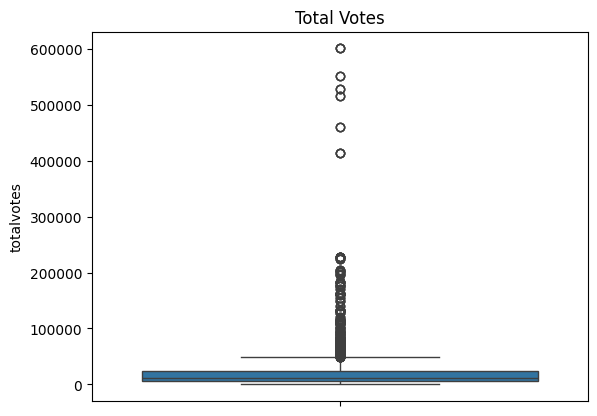

In [22]:
sns.boxplot(df['totalvotes'])
plt.title('Total Votes')

Text(0.5, 1.0, 'Total Votes Normalized')

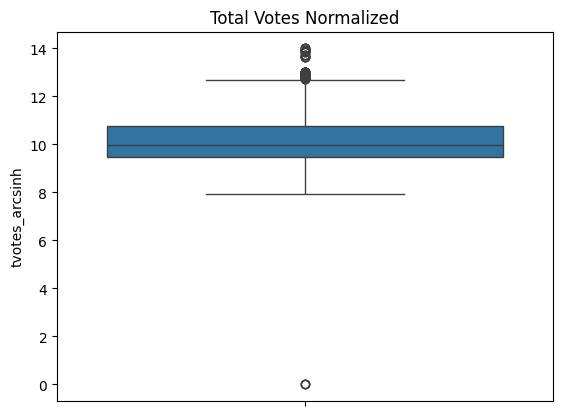

In [23]:
sns.boxplot(df['tvotes_arcsinh'])
plt.title('Total Votes Normalized')

Text(0.5, 1.0, 'Population')

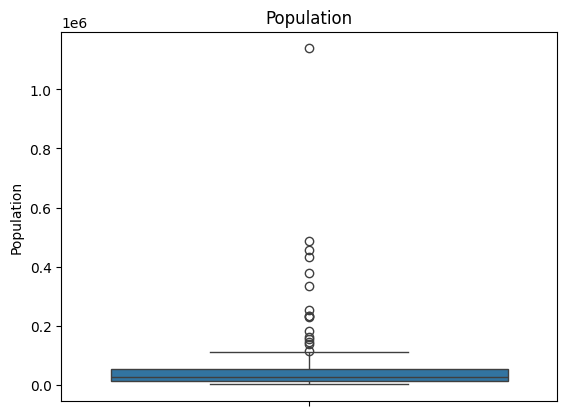

In [24]:
sns.boxplot(cdf['Population'])
plt.title('Population')

Text(0.5, 1.0, 'County Populations Normalized')

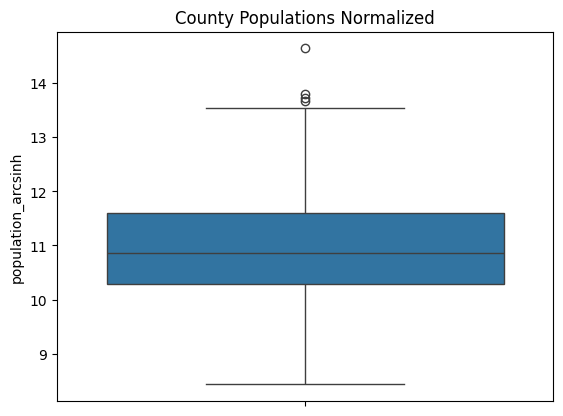

In [25]:
sns.boxplot(cdf['population_arcsinh'])
plt.title('County Populations Normalized')

In [ ]:
vars = ['candidatevotes','year']

VCV = df.loc[:,vars].cov() # Compute the variance-covariance matrix for vars
print("Covariance", '\n', VCV,'\n')

cor = df.loc[:,vars].corr() # Compute the correlation matrix for vars
print("Correlation: ",'\n', cor)


Covariance 
                 candidatevotes         year
candidatevotes    5.145430e+08  8431.836256
year              8.431836e+03    51.947440 

Correlation:  
                 candidatevotes      year
candidatevotes        1.000000  0.051574
year                  0.051574  1.000000


In [ ]:
vars = ['totalvotes','year']

VCV = df.loc[:,vars].cov() # Compute the variance-covariance matrix for vars
print("Covariance", '\n', VCV,'\n')

cor = df.loc[:,vars].corr() # Compute the correlation matrix for vars
print("Correlation: ",'\n', cor)

Covariance 
               totalvotes          year
totalvotes  3.040042e+09  31783.165223
year        3.178317e+04     51.947440 

Correlation:  
             totalvotes      year
totalvotes    1.000000  0.079979
year          0.079979  1.000000


In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
mdf.plot(ax=ax,column='rep_votes_2020',legend=True,cax=cax)

In [ ]:
df['vote_diff'] = mdf['rep_votes_2020']-mdf['dem_votes_2020']

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
mdf.plot(ax=ax,column='vote_diff',legend=True,cax=cax,cmap='bwr',edgecolor='k')